In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [2]:
masterfile = './Data/Master.csv'
master_df = pd.read_csv(masterfile)
master_df.head()
small_df = master_df[['playerID','birthMonth']]
small_df

,playerID,birthMonth
0,aardsda01,12.0
1,aaronha01,2.0
2,aaronto01,8.0
3,aasedo01,9.0
4,abadan01,8.0
...,...,...
18841,zupofr01,8.0
18842,zuvelpa01,10.0
18843,zuverge01,8.0
18844,zwilldu01,11.0


In [3]:
awardfile = './Data/AwardsPlayers.csv'
awards_df = pd.read_csv(awardfile)
awards_df.head()

,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN


In [4]:
print(master_df.shape)
print(awards_df.shape)

(18846, 24)
(6078, 6)


In [5]:
awards_df = awards_df.groupby('playerID').count().sort_values('awardID', ascending = False)

In [6]:
combined_df = pd.merge(small_df,awards_df,on = 'playerID',how = 'right')
combined_df = combined_df.sort_values('awardID',ascending = False)
combined_df

,playerID,birthMonth,awardID,yearID,lgID,tie,notes
108,bondsba01,7.0,47,47,47,0,34
1279,willite01,8.0,39,39,39,0,28
306,dimagjo01,11.0,36,36,36,0,30
848,musiast01,11.0,34,34,34,0,24
1032,ruthba01,2.0,33,33,33,0,32
...,...,...,...,...,...,...,...
841,mullige01,7.0,1,1,1,0,1
271,damonjo01,11.0,1,1,1,0,1
269,cutshge01,7.0,1,1,1,0,1
845,murphda08,4.0,1,1,1,0,0


In [7]:
month_df = combined_df.groupby('birthMonth').sum()
month_df = month_df.reset_index()
month_df

,birthMonth,awardID,yearID,lgID,tie,notes
0,1.0,335,335,335,3,221
1,2.0,434,434,434,3,365
2,3.0,472,472,472,5,360
3,4.0,654,654,654,2,514
4,5.0,587,587,587,3,455
5,6.0,387,387,387,4,301
6,7.0,413,413,413,0,313
7,8.0,552,552,552,3,409
8,9.0,526,526,526,2,399
9,10.0,545,545,545,5,413


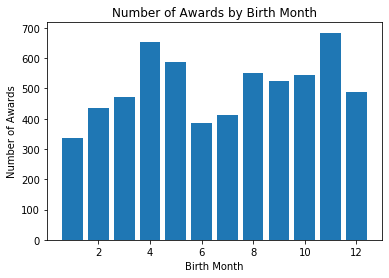

In [8]:
plt.bar(month_df['birthMonth'],month_df['awardID'])
plt.ylabel('Number of Awards')
plt.xlabel('Birth Month')
plt.title('Number of Awards by Birth Month')
plt.show()

In [9]:
battingfile = './Data/Batting.csv'
batting_df = pd.read_csv(battingfile)
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [10]:
small_batting_df = batting_df[['playerID','R','H','RBI','HR','AB']]
small_batting_df = small_batting_df.groupby('playerID').sum()
batting_month_df = pd.merge(small_batting_df,small_df,on = 'playerID',how = 'left')
batting_month_df

,playerID,R,H,RBI,HR,AB,birthMonth
0,aardsda01,0.0,0.0,0.0,0.0,4.0,12.0
1,aaronha01,2174.0,3771.0,2297.0,755.0,12364.0,2.0
2,aaronto01,102.0,216.0,94.0,13.0,944.0,8.0
3,aasedo01,0.0,0.0,0.0,0.0,5.0,9.0
4,abadan01,1.0,2.0,0.0,0.0,21.0,8.0
...,...,...,...,...,...,...,...
18654,zupofr01,3.0,3.0,0.0,0.0,18.0,8.0
18655,zuvelpa01,41.0,109.0,20.0,2.0,491.0,10.0
18656,zuverge01,5.0,21.0,7.0,0.0,142.0,8.0
18657,zwilldu01,167.0,364.0,202.0,30.0,1280.0,11.0


In [11]:
batting_month_df = batting_month_df.groupby('birthMonth').sum()
batting_month_df = batting_month_df.reset_index()

<BarContainer object of 12 artists>

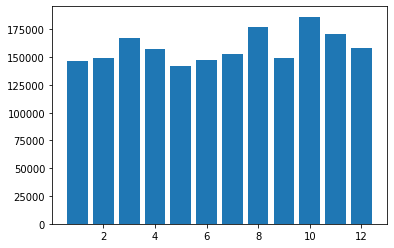

In [12]:
plt.bar(batting_month_df['birthMonth'],batting_month_df['R'])

<BarContainer object of 12 artists>

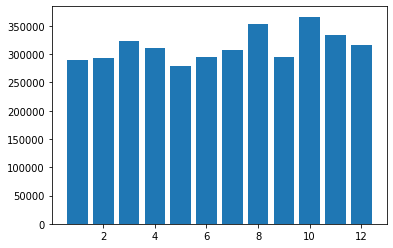

In [13]:
plt.bar(batting_month_df['birthMonth'],batting_month_df['H'])

<BarContainer object of 12 artists>

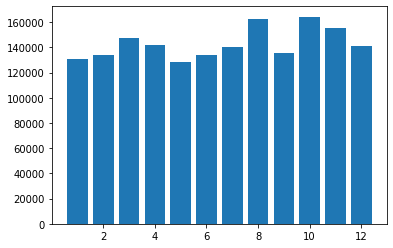

In [14]:
plt.bar(batting_month_df['birthMonth'],batting_month_df['RBI'])

<BarContainer object of 12 artists>

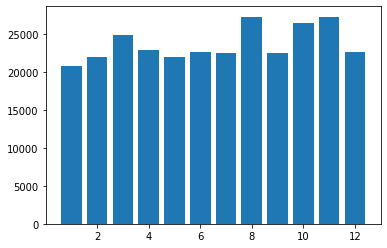

In [15]:
plt.bar(batting_month_df['birthMonth'],batting_month_df['HR'])

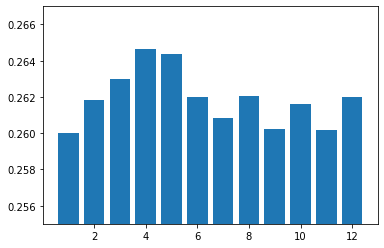

In [48]:
plt.bar(batting_month_df['birthMonth'],batting_month_df['H']/batting_month_df['AB'])
plt.ylim([0.255,0.267])
plt.show()

In [17]:
combined_df = pd.merge(small_df,awards_df,on = 'playerID',how = 'right')
month_count = combined_df['birthMonth'].value_counts().to_frame()
month_count = month_count.reset_index()
combined_df = combined_df.groupby('playerID').sum()
combined_df = combined_df.reset_index()

In [18]:
month_count

,index,birthMonth
0,4.0,128
1,10.0,126
2,8.0,126
3,11.0,125
4,5.0,114
5,9.0,112
6,3.0,109
7,7.0,106
8,12.0,100
9,2.0,98


In [41]:
results_df = pd.merge(combined_df,month_count, right_on = 'index',left_on = 'birthMonth',how = 'left')
results_df = results_df.rename(columns = {'birthMonth_x': 'birthMonth','birthMonth_y':'MonthCount'})
results_df

,playerID,birthMonth,awardID,yearID,lgID,tie,notes,index,MonthCount
0,aaronha01,2.0,16,16,16,0,12,2.0,98
1,abbotji01,9.0,2,2,2,0,1,9.0,112
2,abernte02,3.0,2,2,2,0,0,3.0,109
3,abreubo01,3.0,2,2,2,0,2,3.0,109
4,abreujo02,1.0,2,2,2,0,1,1.0,91
...,...,...,...,...,...,...,...,...,...
1318,zambrca01,6.0,3,3,3,0,3,6.0,88
1319,zimmehe01,2.0,5,5,5,0,5,2.0,98
1320,zimmery01,9.0,4,4,4,0,3,9.0,112
1321,ziskri01,2.0,2,2,2,0,2,2.0,98


In [42]:
results_df['Average Award'] = results_df['awardID'] / results_df['MonthCount']
results_df

,playerID,birthMonth,awardID,yearID,lgID,tie,notes,index,MonthCount,Average Award
0,aaronha01,2.0,16,16,16,0,12,2.0,98,0.163265
1,abbotji01,9.0,2,2,2,0,1,9.0,112,0.017857
2,abernte02,3.0,2,2,2,0,0,3.0,109,0.018349
3,abreubo01,3.0,2,2,2,0,2,3.0,109,0.018349
4,abreujo02,1.0,2,2,2,0,1,1.0,91,0.021978
...,...,...,...,...,...,...,...,...,...,...
1318,zambrca01,6.0,3,3,3,0,3,6.0,88,0.034091
1319,zimmehe01,2.0,5,5,5,0,5,2.0,98,0.051020
1320,zimmery01,9.0,4,4,4,0,3,9.0,112,0.035714
1321,ziskri01,2.0,2,2,2,0,2,2.0,98,0.020408


In [43]:
birthmonthresults_df = results_df.groupby('birthMonth').sum()
birthmonthresults_df = birthmonthresults_df.reset_index()

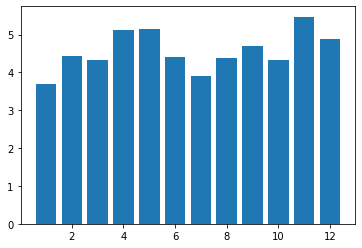

In [44]:
plt.bar(birthmonthresults_df['birthMonth'],birthmonthresults_df['Average Award'])
plt.show()

In [45]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]

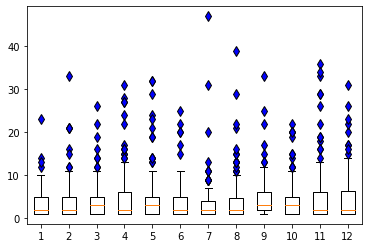

In [47]:
awards = [[] for i in months]

for month in months:

    temp_df = results_df.loc[results_df['birthMonth'] == month,:]
    
    for i in temp_df['awardID']:
        awards[months.index(month)].append(i)
        
        
        

flierprops = {'marker': 'd','markerfacecolor': 'blue','markersize':7}



plt.boxplot(awards,labels = months,flierprops = flierprops)

plt.show()